# *Cálculo Beta en Empresas Cotizadas*

*En anteriores apartados, hemos hecho referencia al cálculo de la Beta de una compañía que cotiza en bolsa. Vamos a ver un ejemplo de como calcularlo en Python, y además los pasos en Excel para ver la diferncia entre ambos.*

*También en este apartado vamos a ver cómo descargar datos desde una web, lo que en muchas ocasiones nos será de mucha utilidad*

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.close("all")

*Importamos esta librería que nos permite leer datos del la página yahoo finance, donde están los principales índices búrsatiles y podemos descargar los datos historicos*

In [3]:
pip install yfinance

In [4]:
import yfinance as yf

*En este apartado instalamos la librería **yfinance** que nos permite descargar datos desde la página Yahoo Finance de forma rápida y sencilla*

*Para descargar el histórico de cotizaciones de una empresa utilizamos esta función, indicando en primer lugar el código de la empresa (a continuación indicamos alguns de los códigos de las empresas cotizadas en el Ibex35, pero podemos buscarlo en la propia página de yahoo), y después indicamos el histórico que queremos descargar, o bien indicamos una fecha de inicio o fin, existen ambas posibilidades.*

**Símbolo	Nombre de la empresa**

**NTGY.MC**	Naturgy Energy Group, S.A.

**CABK.MC**	CaixaBank, S.A.

**ACS.MC**	ACS, Actividades de Construcción y Servicios, S.A.

**ENG.MC**	Enagás, S.A.

**BKT.MC**	Bankinter, S.A.

**AENA.MC**	Aena S.M.E., S.A.

**ELE.MC**	Endesa, Sociedad Anonima

**SGRE.MC**	Siemens Gamesa Renewable Energy, S.A.

**TEF.MC**	Telefónica, S.A.

**REP.MC**	Repsol, S.A.

**IBE.MC**	Iberdrola, S.A.

**SAN.MC**	Banco Santander, S.A.

**MAP.MC**	Mapfre, S.A.

*En el caso de Excel hay algunos tutoriales acerca de diversas opciones para importar datos desde web, sin embargo en este caso se pueden copiar los datos y directamente pegarlos, Excel va a reconocer cada importe en cada celda realizando una tabla*

In [5]:
data = yf.download("CABK.MC", period = '5y')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


*Aquí podemos ver el precio de cotización de apertura, el más alto del día, el más bajo y el precio de cierre, además del precio de cierro ajustado y el volumen de operaciones. Hemos seleccionado Caixabank pero podemos elegir el valor que queramos dentro del Ibex indicando los códigos*

*La columna que nos interesa será los precios de cierre, por ello mediante la librería pandas vamos a eliminar el resto de columnas. Este paso se puede realizar de múltiples maneras, en nuestro caso hemos selecionado esta, pero cualquier otra fórmula dentro de pandas que nos deje tan solo la columna "Close" es válida*

In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-18,2.603,2.642,2.547,2.598,2.142713,21383874
2016-04-19,2.614,2.652,2.600,2.612,2.154259,23250852
2016-04-20,2.567,2.700,2.560,2.686,2.215292,18153323
2016-04-21,2.700,2.810,2.692,2.794,2.304365,18341491
2016-04-22,2.785,2.847,2.780,2.828,2.332407,16461857
...,...,...,...,...,...,...
2021-04-12,2.583,2.627,2.555,2.601,2.601000,7111565
2021-04-13,2.606,2.619,2.538,2.559,2.559000,17478085
2021-04-14,2.557,2.588,2.542,2.588,2.588000,7407855


In [7]:
data = data.loc[:,["Adj Close"]]

*Vamos a añadir una columna que nos calcula el logaritmo de todos los retornos, lo que implica la rentabilidad del valor. Para ello necesitamos la librería numpy, y selecionamos la fila anterior mediante el código "shift(1)" de pandas*

In [8]:
data["Rentabilidad Valor"] = np.log( data / data.shift(1))

In [9]:
data

,Adj Close,Rentabilidad Valor
Date,,
2016-04-18,2.142713,NaN
2016-04-19,2.154259,0.005374
2016-04-20,2.215292,0.027937
2016-04-21,2.304365,0.039421
2016-04-22,2.332407,0.012095
...,...,...
2021-04-12,2.601000,0.005397
2021-04-13,2.559000,-0.016279
2021-04-14,2.588000,0.011269


*En Excel tendremos que usar la fórmula **=LN((valor día/valor día anterior))**.*

array([<AxesSubplot:xlabel='Date'>], dtype=object)

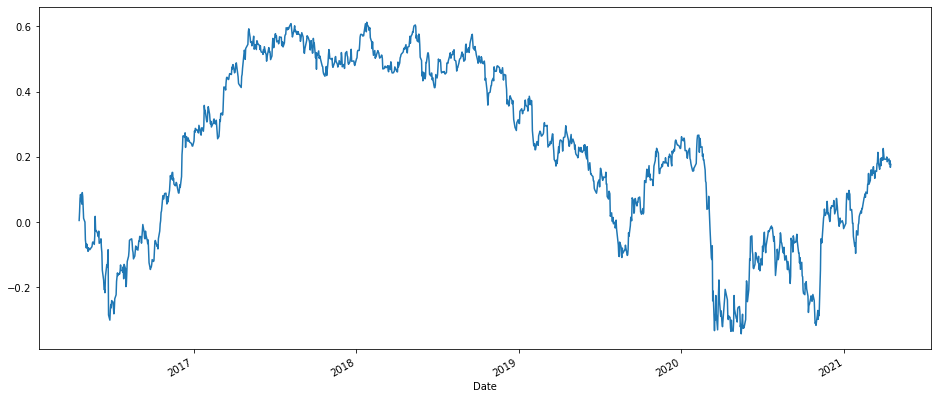

In [10]:
data['Rentabilidad Valor'].cumsum().plot(subplots=True,figsize=(16,7)) 

*Mediante este gráfico podemos ver la evolución de CaixaBank en los últimos 5 años*

*Ahora, vamos a hacer lo mismo pero con el índice de referencia, en este caso **IBEX35**. Hay que tener en cuenta que podemos hacerlo con cualquiera de los índices que están publicados*

In [11]:
mercado = yf.download("^IBEX", period = '5y')
mercado = pd.DataFrame(mercado)

[*********************100%***********************]  1 of 1 completed


In [49]:
mercado

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-18,8703.400391,8891.500000,8674.099609,8881.599609,8881.590820,243875900
2016-04-19,8914.500000,9004.200195,8890.200195,8971.299805,8971.291016,293009300
2016-04-20,8948.400391,9161.900391,8940.000000,9147.200195,9147.191406,305434000
2016-04-21,9178.500000,9218.700195,9120.599609,9197.200195,9197.190430,324423800
2016-04-22,9183.900391,9244.400391,9161.599609,9232.799805,9232.790039,299600000
...,...,...,...,...,...,...
2021-04-12,8556.099609,8556.900391,8481.000000,8532.599609,8532.599609,131409400
2021-04-13,8533.200195,8568.299805,8467.299805,8525.099609,8525.099609,152574000
2021-04-14,8532.599609,8595.700195,8510.099609,8588.400391,8588.400391,133519000


In [12]:
mercado = mercado.loc[:,["Close"]]

In [13]:
mercado

,Close
Date,
2016-04-18,8881.599609
2016-04-19,8971.299805
2016-04-20,9147.200195
2016-04-21,9197.200195
2016-04-22,9232.799805
...,...
2021-04-12,8532.599609
2021-04-13,8525.099609
2021-04-14,8588.400391


In [28]:
mercado["Rentabilidad mercado"] = np.log(1 + mercado.pct_change())

In [29]:
mercado

,Close,Rentabilidad mercado
Date,,
2016-04-18,8881.599609,NaN
2016-04-19,8971.299805,0.010049
2016-04-20,9147.200195,0.019417
2016-04-21,9197.200195,0.005451
2016-04-22,9232.799805,0.003863
...,...,...
2021-04-12,8532.599609,-0.003883
2021-04-13,8525.099609,-0.000879
2021-04-14,8588.400391,0.007398


array([<AxesSubplot:xlabel='Date'>], dtype=object)

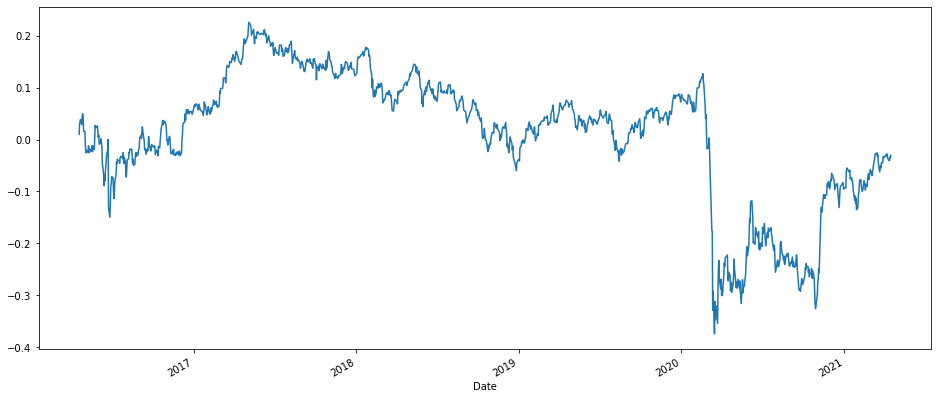

In [30]:
mercado['Rentabilidad mercado'].cumsum().plot(subplots=True,figsize=(16,7)) 

*En este gráfico vemos la evolución del Ibex35 en los últimos 5 años. Hasta aquí hemos realizado exactamente los mismos pasos para descargar el valor y el índice.*

*Ahora vamos a hacer un único DataFrame para tener los datos en un mismo archivo*

In [31]:
data["Close Mercado"] = mercado['Close']
data["Rentabilidad Mercado"] = mercado['Rentabilidad mercado']

In [32]:
data.dropna()

,Adj Close,Rentabilidad Valor,Close Mercado,Rentabilidad Mercado
Date,,,,
2016-04-19,2.154259,0.005374,8971.299805,0.010049
2016-04-20,2.215292,0.027937,9147.200195,0.019417
2016-04-21,2.304365,0.039421,9197.200195,0.005451
2016-04-22,2.332407,0.012095,9232.799805,0.003863
2016-04-25,2.264777,-0.029424,9140.000000,-0.010102
...,...,...,...,...
2021-04-12,2.601000,0.005397,8532.599609,-0.003883
2021-04-13,2.559000,-0.016279,8525.099609,-0.000879
2021-04-14,2.588000,0.011269,8588.400391,0.007398


*Podemos exportar este fichero a Excel, en este caso lo hemos realizado para cotejar los resultados y verificar que los cálculos son correctos, pero no es necesario. También podemos descargar varios valores, unirlos en un DataFrame y exportar a Excel para realizar cálculos u visualizaciones*

In [57]:
data.to_excel("Data.xlsx", sheet_name="Sheet1")

*Recordemos cómo se calcula la Beta de una compañía*

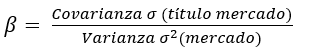

*Ahora directamente vamos a aplicar la fórmula. Igualmente hay varios métodos para este cálculo, se puede hacer por partes, para que vayamos viendo cada uno de los pasos, o bien se puede aplicar de una sola vez.*

*En este caso, el primer paso es calcular la covarianza del título de mercado, que en nuestro caso es Caixabank. Mediante "data.cov()" calculamos la covarianza de todo el fichero, pero a nostros la que nos interesa es la del título, por ello seleccionamos la fila 1, la columna 3*

In [33]:
cov = data.cov()

In [34]:
cov

,Adj Close,Rentabilidad Valor,Close Mercado,Rentabilidad Mercado
Adj Close,0.488068,0.000555,6.357812e+02,0.000178
Rentabilidad Valor,0.000555,0.000525,1.107394e+00,0.000229
Close Mercado,635.781167,1.107394,1.142471e+06,0.693111
Rentabilidad Mercado,0.000178,0.000229,6.931114e-01,0.000172


In [35]:
cov_CABK = cov.iloc[1,3]  #usamos la covarianza que corresponde a la línea 1, columna 3 (teniendo en cuenta que hay 0,1,2,3)

In [36]:
cov_CABK

0.00022894469513139152

*Calculemos ahora la varianza del mercado*

In [37]:
IBEX_var = data['Rentabilidad Mercado'].var()
IBEX_var

0.000172299683079531

*Finalmente calculamos la Beta de la compañía*

In [38]:
CABK_beta= cov_CABK / IBEX_var # division entre la covarianza contra mercado dividido entre la varianza del mercado
CABK_beta

1.3287586549170494

*En Excel usaremos la fórmula **COVAR(matriz rentabilidad valor; matriz rentabilidad mercado)**, por otro lado **=VAR(matriz rentabilidad mercado)**, para después dividir ambos valores.*

**Interpretación:** *La Beta es una variable que mide la diferencia de rentabilidad de una acción respecto a su índice de referencia.
Por ejemplo, si Acerinox tiene una Beta de 1,1 respecto al Ibex 35 quiere decir que Acerinox se moverá un 10% más de lo que lo haga el Ibex 35. Si el Ibex 35 sube un 10% Acerinox subirá un 11%, y si el Ibex 35 baja un 10% Acerinox bajará un 11%.
De forma similar si Abertis tiene una Beta de 0,80 en caso de que el Ibex 35 suba un 10% Abertis subirá un 8%, mientras que si el Ibex 35 cae un 10% Abertis bajará un 8%.
Un valor con una Beta de 1 se movería exactamente igual que el mercado.
Algunos valores pueden tener Beta negativa. Eso quiere decir que cuando el mercado cae esos valores suben y cuando el mercado sube esos valores bajan. Son casos raros pero existen.
De igual forma la Beta de una compañía cambia en función del tiempo que analicemos*

array([<AxesSubplot:xlabel='Date'>], dtype=object)

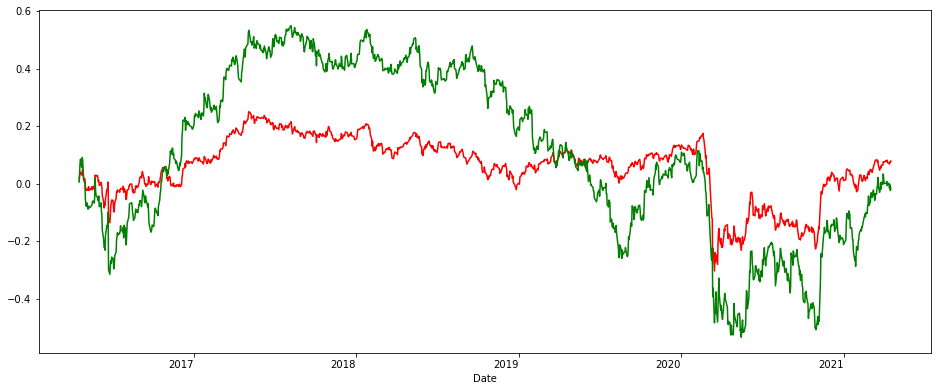

In [36]:
mercado['Rentabilidad mercado'].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')
data['Rentabilidad Valor'].cumsum().plot(subplots=True,figsize=(16,7), color = 'green') 

*En este gráfico podemos comprobar la evolución de la rentabilidad de Caixabank respecto al IBEX35, en rojo vemos la volatilidad del índice, mientras que en verde vemos la de nuestro valor. Si analizamos el periodo anterior al 2017 nuestra Beta será menor que si analizamos el periodo comprendido entre 2017 y 2020, en cualquier caso la mayor parte de la veces nuestra Beta es mayor a 1, porque sigue los movimientos del Ibex35, superándolos, si el índice baja, nuestro valor baja más, y si el índice sube, nuestro valor lo hace más también.*

*Estre gráfico nos permite ver ciertas anomalías que pueden afectar a índice bursátil, como en este caso el Covid19, donde podemos ver claramente que índice y valor se fusionan prácticamente.*